In [80]:
# MERGE PLAYER ACTIVITY STATS

import pandas as pd
import numpy as np
player_stats = pd.read_csv('player_statistics.csv')
item_spend = pd.read_csv('item_spend.csv')
player_activity = pd.read_csv('player_activity.csv')


# Merge left player_stats + item_spend
merged = pd.merge(player_stats, item_spend, on=['account_id', 'platform_id', 'occur_date'], how='left')

# Merge left the resulting dataframe with player_activity
merged = pd.merge(merged, player_activity, on=['account_id', 'platform_id', 'occur_date'], how='left')
aggregated_df = merged.groupby(['account_id', 'platform_id', 'occur_date']).agg({
    'ltd_days_played': 'first',  # You can choose an appropriate aggregation method
    'evc_balance': 'sum',        # For numeric columns, you might want to sum or take the first value
    'pvc_balance': 'sum',
    'char_rank': 'first',
    'time_spent': 'sum',
    'suicides': 'sum',
    'success': 'sum',
    'money_vs_time_spent': 'sum',
    'daily_playtime': 'sum'       # Sum playtime for the same day
    # Add more columns as needed
}).reset_index()
aggregated_df['pvc_balance'] = aggregated_df['pvc_balance'] / 80000
aggregated_df

,account_id,platform_id,occur_date,ltd_days_played,evc_balance,pvc_balance,char_rank,time_spent,suicides,success,money_vs_time_spent,daily_playtime
0,0,XBOX,10/10/2020,182,1.648404e+06,0.14296,34,20.827716,0.0,0.0,0.884604,1.136359
1,0,XBOX,10/11/2020,183,4.052501e+05,0.00000,35,0.000000,0.0,0.0,0.000000,0.184363
2,0,XBOX,10/19/2020,184,4.053223e+05,0.00000,35,2.594007,0.0,0.0,0.385504,0.124253
3,0,XBOX,10/24/2020,186,4.107461e+05,0.00000,35,0.000000,0.0,0.0,0.000000,0.074666
4,0,XBOX,10/26/2020,188,2.152324e+05,0.00000,35,2.680474,0.0,0.0,291.186226,0.444627
...,...,...,...,...,...,...,...,...,...,...,...,...
246132,9526,PS4,9/3/2020,105,1.437182e+05,0.00000,28,0.000000,0.0,0.0,0.000000,0.518382
246133,9526,PS4,9/4/2020,106,1.437182e+05,0.00000,28,0.000000,0.0,0.0,0.000000,0.000000
246134,9526,PS4,9/7/2020,108,3.042103e+05,0.00000,29,5.609016,0.0,0.0,212.318101,1.657790
246135,9526,PS4,9/8/2020,110,1.729391e+05,0.00000,29,0.000000,0.0,0.0,0.000000,0.898548


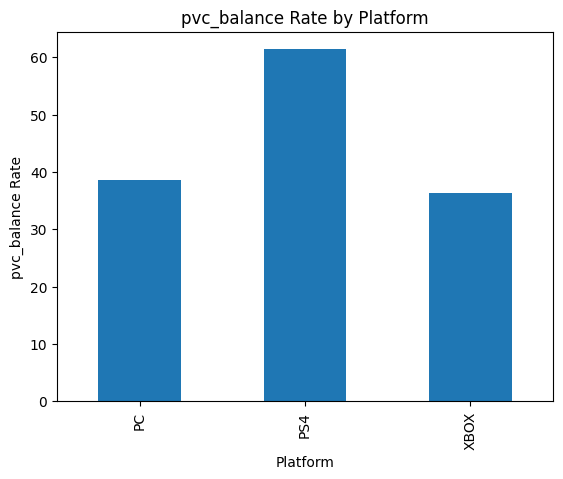

In [90]:
# IN PROGRESS pvc_balance RATE

platform_pvc_balance = aggregated_df.groupby('platform_id')['pvc_balance'].sum()
average_pvc_balance_per_player = aggregated_df.groupby('platform_id')['pvc_balance'].sum() / aggregated_df.groupby('platform_id')['account_id'].nunique()

# Plot the results
average_pvc_balance_per_player.plot(kind='bar', xlabel='Platform', ylabel='Average PVC Balance per Player', title='PVC Balance')

# Show the plot
# REF: platform_id

platform_pvc_balance = aggregated_df.groupby('platform_id')['pvc_balance'].sum()
average_pvc_balance_per_player = aggregated_df.groupby('platform_id')['pvc_balance'].sum() / aggregated_df.groupby('platform_id')['account_id'].nunique()

# Plot the results
average_pvc_balance_per_player.plot(kind='bar', xlabel='Platform', ylabel='Average pvc_balance per Player (hours)', title='Player pvc_balance by Platform')

# Show the plot
# plt.show()

# Plot the results or perform further analysis
# platform_pvc_balance.plot(kind='bar', xlabel='Platform', ylabel='Total pvc_balance (hours)', title='Player pvc_balance by Platform')

# # Show the plot
# plt.show()


# TABLE: group by platform_id based on unique account_id

platform_pvc_balance = aggregated_df.groupby('platform_id')['pvc_balance'].sum()

# 1 USD: 80,000 GTA $
average_pvc_balance_per_player = aggregated_df.groupby('platform_id')['pvc_balance'].sum() / aggregated_df.groupby('platform_id')['account_id'].nunique()

# Plot the results
average_pvc_balance_per_player.plot(kind='bar', xlabel='Platform', ylabel='Average PVC Balance per Player', title='PVC Balance')

# Show the plot

platform_pvc_balance_rate = aggregated_df.groupby('platform_id')['pvc_balance'].mean()

# Plot the results or perform further analysis
platform_pvc_balance_rate.plot(kind='bar', xlabel='Platform', ylabel='pvc_balance Rate', title='pvc_balance Rate by Platform')

# Show the plot
plt.show()

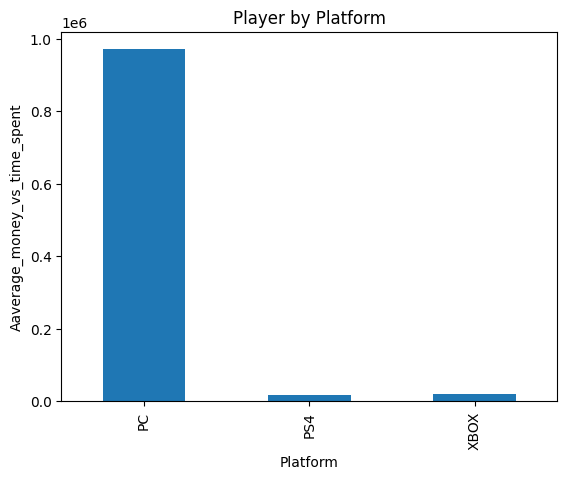

In [91]:
# plt.scatter(aggregated_df['money_vs_time_spent'], aggregated_df['platform_id'], alpha=0.5)
# plt.xlabel('Money vs. Time Spent')
# plt.ylabel('Platform')
# plt.title('Money vs. Time Spent by Platform')
# plt.show()
average_money_vs_time_spent = aggregated_df.groupby('platform_id')['money_vs_time_spent'].mean()

# Plot the results using a bar plot
average_money_vs_time_spent.plot(kind='bar', xlabel='Platform', ylabel='Aaverage_money_vs_time_spent', title='Player by Platform')
plt.show()

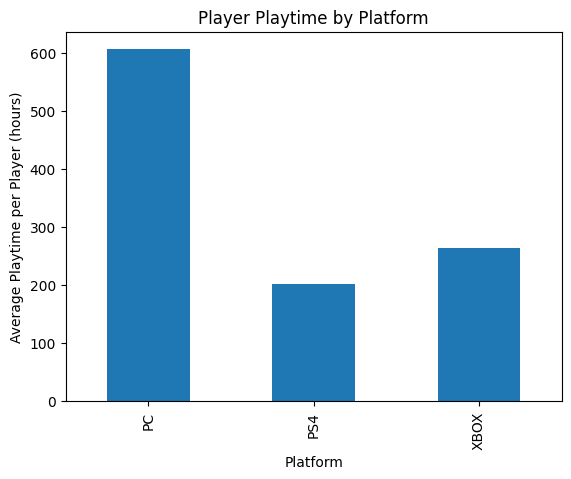

In [83]:
# PLAYER PLAYTIME BY PLATFORM

platform_playtime = aggregated_df.groupby('platform_id')['daily_playtime'].sum()
average_playtime_per_player = aggregated_df.groupby('platform_id')['daily_playtime'].sum() / aggregated_df.groupby('platform_id')['account_id'].nunique()

# Plot the results
average_playtime_per_player.plot(kind='bar', xlabel='Platform', ylabel='Average Playtime per Player (hours)', title='Player Playtime by Platform')

# Show the plot
plt.show()



platform_id
PC      1670
PS4     2576
XBOX    5230
Name: account_id, dtype: int64


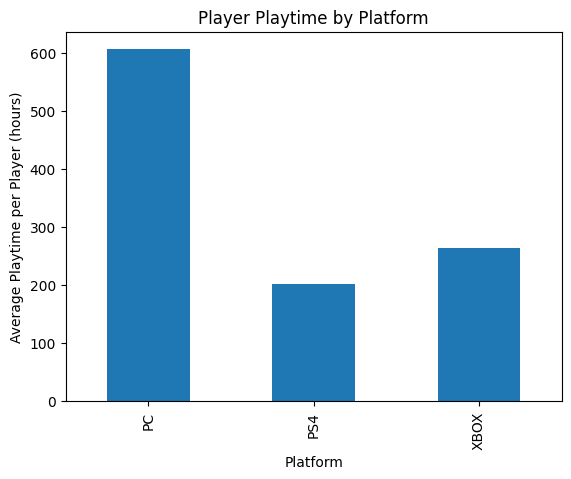

In [84]:
# REF: platform_id

platform_playtime = aggregated_df.groupby('platform_id')['daily_playtime'].sum()
average_playtime_per_player = aggregated_df.groupby('platform_id')['daily_playtime'].sum() / aggregated_df.groupby('platform_id')['account_id'].nunique()

# Plot the results
average_playtime_per_player.plot(kind='bar', xlabel='Platform', ylabel='Average Playtime per Player (hours)', title='Player Playtime by Platform')

# Show the plot
# plt.show()

# Plot the results or perform further analysis
# platform_playtime.plot(kind='bar', xlabel='Platform', ylabel='Total Playtime (hours)', title='Player Playtime by Platform')

# # Show the plot
# plt.show()

print(aggregated_df.groupby('platform_id')['account_id'].nunique())

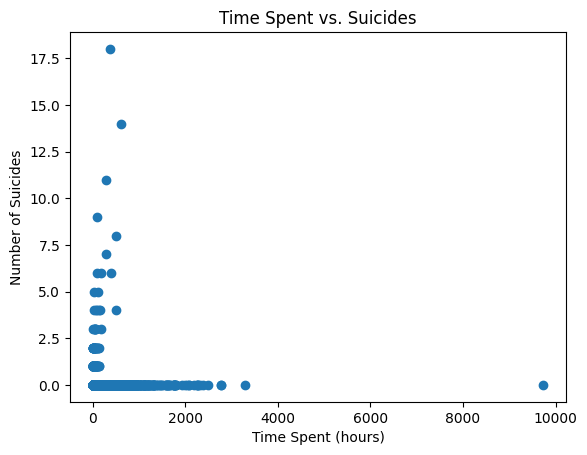

In [85]:
#time_spent vs. suicides
# aggregated_df
plt.scatter(aggregated_df['time_spent'], aggregated_df['suicides'])
plt.xlabel('Time Spent (hours)')
plt.ylabel('Number of Suicides')
plt.title('Time Spent vs. Suicides')
plt.show()

<Axes: title={'center': 'Suicides vs Money Spent ($USD)'}, xlabel='Suicides', ylabel='Money Spent ($USD)'>

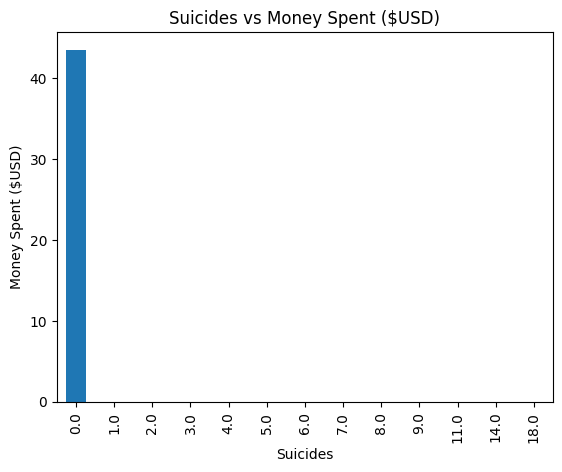

In [86]:
# TODO: graph - suicides vs. money spent
# note: not a very effective visual graph

# GRAPH: money_spent (irl money) vs suicides (more invested players)

# gta_money_to_usd = 80000    # 1 USD: 80,000 GTA $
platform_playtime = aggregated_df.groupby('suicides')['pvc_balance'].sum()
# aggregated_df['pvc_balance'] = aggregated_df['pvc_balance'] / gta_money_to_usd
average_playtime_per_player = aggregated_df.groupby('suicides')['pvc_balance'].sum() / aggregated_df.groupby('suicides')['account_id'].nunique()

# Plot the results
average_playtime_per_player.plot(kind='bar', xlabel='Suicides', ylabel='Money Spent ($USD)', title='Suicides vs Money Spent ($USD)')



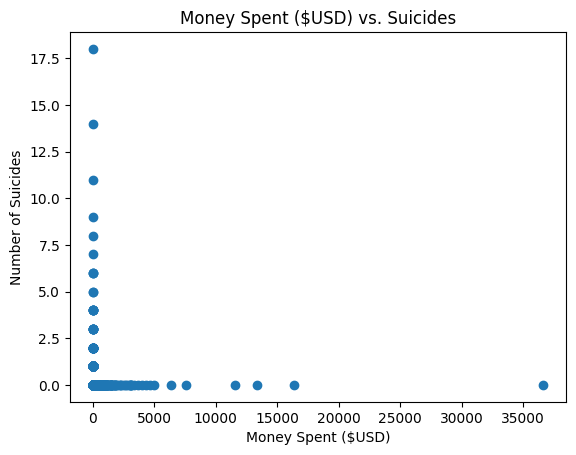

In [87]:
# GRAPH: money_spent_per_day vs. suicides

plt.scatter(aggregated_df['pvc_balance'], aggregated_df['suicides'])
plt.xlabel('Money Spent ($USD)')
plt.ylabel('Number of Suicides')
plt.title('Money Spent ($USD) vs. Suicides')
plt.show()

# HYPOTHESIS: players who commit more suicides (presumably as a means to restart and get a perfect run)
# do not have any spending; in contrast, most players who make payments do not have any suicides

platform_id
PC      1670
PS4     2576
XBOX    5230
Name: account_id, dtype: int64


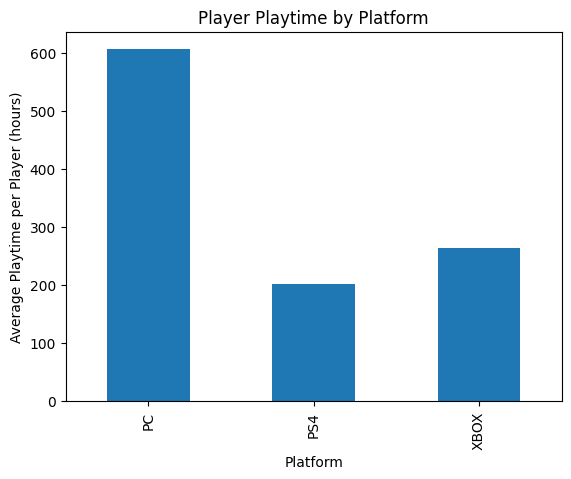

In [88]:
# TABLE: group by platform_id based on unique account_id

platform_playtime = aggregated_df.groupby('platform_id')['daily_playtime'].sum()
average_playtime_per_player = aggregated_df.groupby('platform_id')['daily_playtime'].sum() / aggregated_df.groupby('platform_id')['account_id'].nunique()

# Plot the results
average_playtime_per_player.plot(kind='bar', xlabel='Platform', ylabel='Average Playtime per Player (hours)', title='Player Playtime by Platform')

# Show the plot
# plt.show()

# Plot the results or perform further analysis
# platform_playtime.plot(kind='bar', xlabel='Platform', ylabel='Total Playtime (hours)', title='Player Playtime by Platform')

# # Show the plot
# plt.show()

print(aggregated_df.groupby('platform_id')['account_id'].nunique())

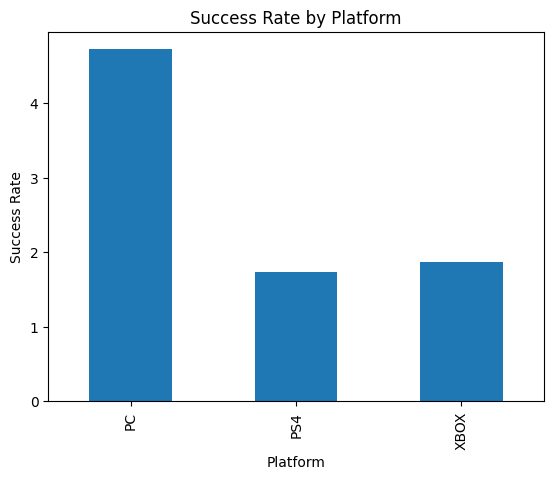

In [89]:
platform_success_rate = aggregated_df.groupby('platform_id')['success'].mean()

# Plot the results or perform further analysis
platform_success_rate.plot(kind='bar', xlabel='Platform', ylabel='Success Rate', title='Success Rate by Platform')

# Show the plot
plt.show()